In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import collections
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir('C:/Users/tmutengwa/Documents/Acadgild/DataSources')
os.listdir()

['379',
 'adult.data',
 'adult.test',
 'champagne.csv',
 'champagne.txt',
 'cifar-10-python.tar.gz',
 'compressed_racoon.png',
 'CountingWords',
 'database.sqlite',
 'database.sqlite.zip',
 'dataset.csv',
 'data_stocks.csv',
 'Git-2.24.0.2-64-bit.exe',
 'nba_2013.csv',
 'Pima_diabetes_Tree.png',
 'pima_indians_diabetes_data.csv',
 'plot-churn_by_contract.png',
 'plot_dist-Churn Label.png',
 'plot_dist-Contract.png',
 'plot_dist-Dependents.png',
 'plot_dist-Device Protection.png',
 'plot_dist-Gender.png',
 'plot_dist-Internet Service.png',
 'plot_dist-Multiple Lines.png',
 'plot_dist-Online Backup.png',
 'plot_dist-Online Security.png',
 'plot_dist-Paperless Billing.png',
 'plot_dist-Partner.png',
 'plot_dist-Payment Method.png',
 'plot_dist-Phone Service.png',
 'plot_dist-Senior Citizen.png',
 'plot_dist-Streaming Movies.png',
 'plot_dist-Streaming TV.png',
 'plot_dist-Tech Support.png',
 'shampoo-sales.csv',
 'stock_portfolio.csv',
 'surveys.csv',
 'Telco_customer_churn.csv',
 'uci-pi

In [3]:
df = pd.read_csv('Telco_customer_churn.csv',index_col='CustomerID')

### Inspect Data

In [4]:
df.head().T

CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
Count,1,1,1,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.9641,34.0593,34.048,34.0621,34.0392
Longitude,-118.273,-118.307,-118.294,-118.316,-118.266
Gender,Male,Female,Female,Female,Male
Senior Citizen,No,No,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 32 columns):
Count                7043 non-null int64
Country              7043 non-null object
State                7043 non-null object
City                 7043 non-null object
Zip Code             7043 non-null int64
Lat Long             7043 non-null object
Latitude             7043 non-null float64
Longitude            7043 non-null float64
Gender               7043 non-null object
Senior Citizen       7043 non-null object
Partner              7043 non-null object
Dependents           7043 non-null object
Tenure Months        7043 non-null int64
Phone Service        7043 non-null object
Multiple Lines       7043 non-null object
Internet Service     7043 non-null object
Online Security      7043 non-null object
Online Backup        7043 non-null object
Device Protection    7043 non-null object
Tech Support         7043 non-null object
Streaming TV         7043 non-null object
St

In [6]:
df.drop(columns = ['Churn Reason', 'Churn Score'], inplace = True)

In [7]:
df.describe(include=object).T

,count,unique,top,freq
Country,7043,1,United States,7043
State,7043,1,California,7043
City,7043,1129,Los Angeles,305
Lat Long,7043,1652,"33.753146, -118.367459",5
Gender,7043,2,Male,3555
Senior Citizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,5416
Phone Service,7043,2,Yes,6361
Multiple Lines,7043,3,No,3390


### Data Manipulation

In [8]:
# Check for missing values
df.isna().any()

Count                False
Country              False
State                False
City                 False
Zip Code             False
Lat Long             False
Latitude             False
Longitude            False
Gender               False
Senior Citizen       False
Partner              False
Dependents           False
Tenure Months        False
Phone Service        False
Multiple Lines       False
Internet Service     False
Online Security      False
Online Backup        False
Device Protection    False
Tech Support         False
Streaming TV         False
Streaming Movies     False
Contract             False
Paperless Billing    False
Payment Method       False
Monthly Charges      False
Total Charges        False
Churn Label          False
Churn Value          False
CLTV                 False
dtype: bool

In [9]:
df.drop(columns =['Country', 'State', 'City', 'Zip Code', 'Lat Long',
        'Latitude', 'Longitude', 'Churn Value', 'CLTV'], inplace = True)

In [10]:
df.dtypes

Count                  int64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
dtype: object

In [11]:
#Here we can see that Total Charges is an object variable. Let's Change it to float
df['Total Charges'] = df['Total Charges'].apply(pd.to_numeric, errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 21 columns):
Count                7043 non-null int64
Gender               7043 non-null object
Senior Citizen       7043 non-null object
Partner              7043 non-null object
Dependents           7043 non-null object
Tenure Months        7043 non-null int64
Phone Service        7043 non-null object
Multiple Lines       7043 non-null object
Internet Service     7043 non-null object
Online Security      7043 non-null object
Online Backup        7043 non-null object
Device Protection    7043 non-null object
Tech Support         7043 non-null object
Streaming TV         7043 non-null object
Streaming Movies     7043 non-null object
Contract             7043 non-null object
Paperless Billing    7043 non-null object
Payment Method       7043 non-null object
Monthly Charges      7043 non-null float64
Total Charges        7032 non-null float64
Churn Label          7043 non-null object
d

In [12]:
df.isnull().sum()

Count                 0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
dtype: int64

In [13]:
df['Total Charges'] = df['Total Charges'].fillna((df['Total Charges'].mean()))

### Exploratory Data Analysis

In [14]:
#select data types that include only objects
df_categorical =  df.select_dtypes(include='object')
column_categorical = df_categorical.columns
display(column_categorical)

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Label'],
      dtype='object')

In [15]:
df_categorical.head()

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label
CustomerID,,,,,,,,,,,,,,,,,
3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
9237-HQITU,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
9305-CDSKC,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
7892-POOKP,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
0280-XJGEX,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes


In [16]:
#select data types that include floating values
df_numerical =  df.select_dtypes(include='float64')
column_numerical = df_numerical.columns

In [17]:
df_numerical.head()

,Monthly Charges,Total Charges
CustomerID,,
3668-QPYBK,53.85,108.15
9237-HQITU,70.70,151.65
9305-CDSKC,99.65,820.50
7892-POOKP,104.80,3046.05
0280-XJGEX,103.70,5036.30


### Univariate Analysis

In [18]:
def display_plot(df, col_to_exclude, object_mode = True):
    """
    This function plots the count or distribution of each column in the dataframe based on
    @Args
    df: pandas dataframe
    col_to_exclude: specific column to exclude from the plot, used for excluded key
    object_mode: whether to plot on object data types or not (default: True)
    Return
    No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    if object_mode:
        nrows = 4
        ncols = 4
        width = 20
        height = 20
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
    
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col])
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])
                                                                              
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1
                                                                              
    plt.show();
    return None

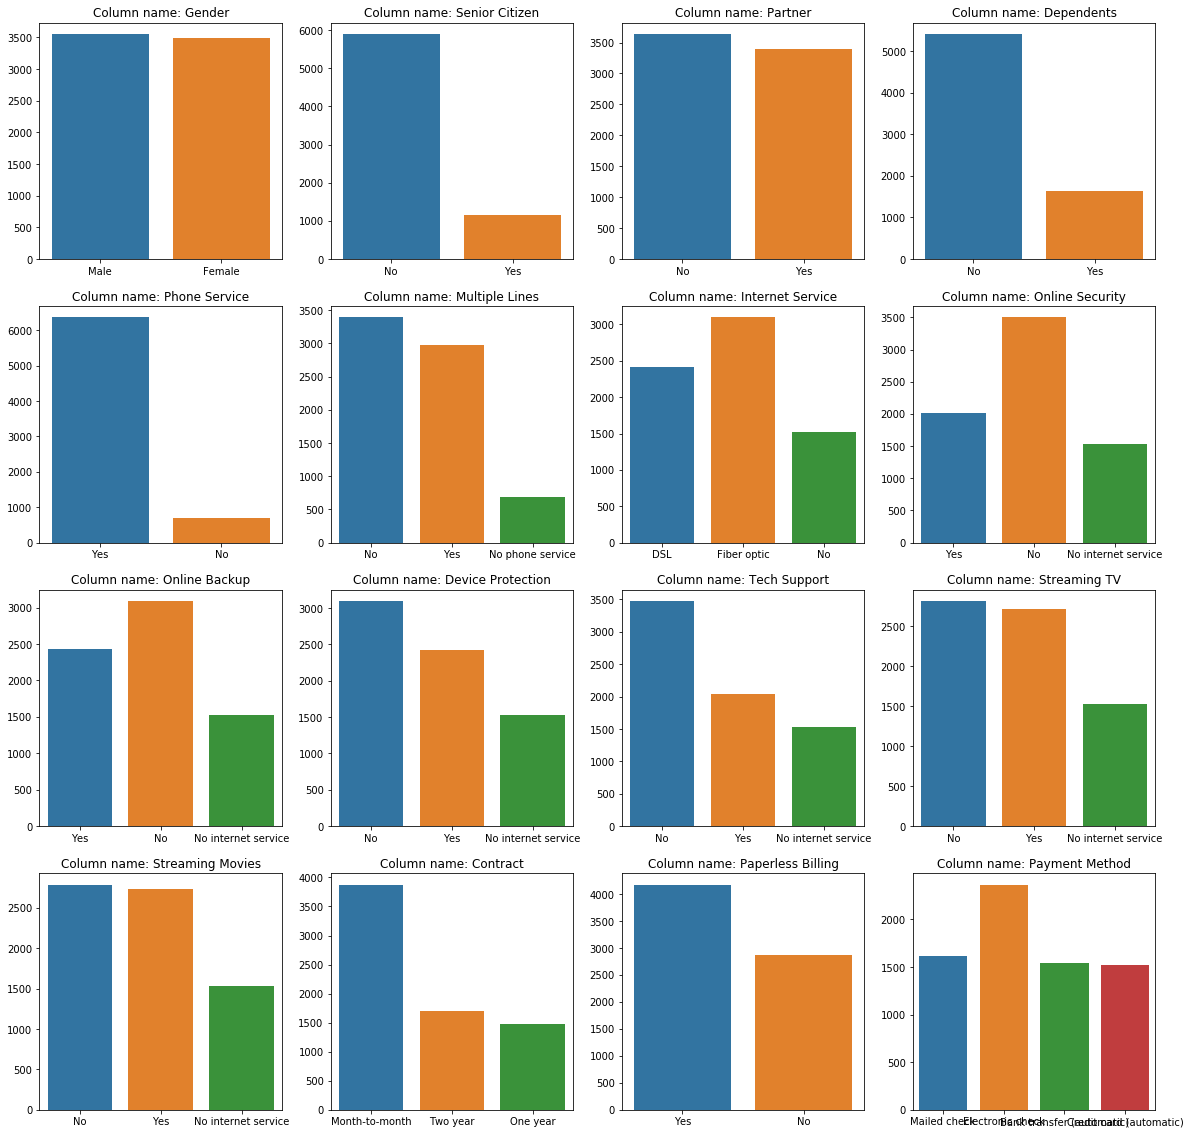

In [19]:
display_plot(df, 'customerid', object_mode = True)

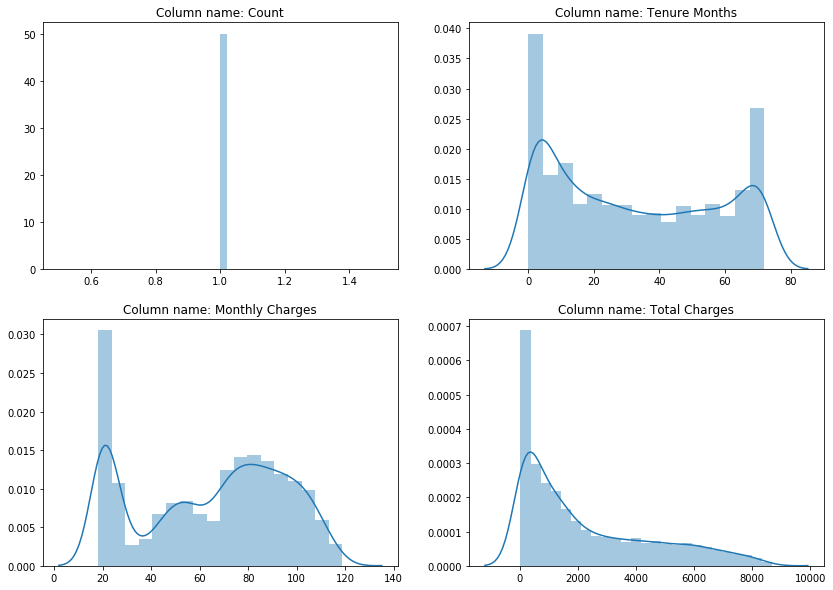

In [20]:
display_plot(df, 'customerid', object_mode = False)

### feature Engineering

##### Based on the value of the services the subscribers subscribed to, there are yes, no, and no phone / internet service. These are somewhat related to primary products. Examples are illustrated through panda crosstab function below:

##### 1. Phone service (Primary) and Multiple lines (Secondary)

If the subscribers have phone service, they may have multiple lines (yes or no).
But if the subscribers don't have phone service, the subscribers will never have multiple lines.

In [21]:
pd.crosstab(index = df["Phone Service"], columns = df["Multiple Lines"])

Multiple Lines,No,No phone service,Yes
Phone Service,,,
No,0,682,0
Yes,3390,0,2971


##### 2. Internet Service (Primary) and other services, let's say streaming TV (secondary)
If the subscribers have Internet services (either DSL or Fiber optic), the subscribers may opt to have
other services related to Internet (i.e. streaming TV, device protection).
But if the subscribers don't have the Internet services, this secondary service will not be available for
the subscribers.

In [22]:
pd.crosstab(index = df["Internet Service"], columns = df["Streaming TV"])

Streaming TV,No,No internet service,Yes
Internet Service,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


##### With this conclusion, I opt to transform the feature value of No Phone / Internet service to be the same No because it can be used another features (hence, phone service and internet service column) to explain.

In [23]:
#def convert_no_service(func):
    # 6 features, convert 'No phone service'/ 'no internet service' to 'no'
no_service = ['Multiple Lines', 'Online Security', 'Online Backup',
                  'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
                       
for i in no_service:
    df[i] = df[i].map({'No internet service': 'No',
                       'No phone service': 'No',
                           'Yes': 'Yes',
                           'No': 'No'}).astype('category')
for i in no_service:
    print(df[i].value_counts())

No     4072
Yes    2971
Name: Multiple Lines, dtype: int64
No     5024
Yes    2019
Name: Online Security, dtype: int64
No     4614
Yes    2429
Name: Online Backup, dtype: int64
No     4621
Yes    2422
Name: Device Protection, dtype: int64
No     4999
Yes    2044
Name: Tech Support, dtype: int64
No     4336
Yes    2707
Name: Streaming TV, dtype: int64
No     4311
Yes    2732
Name: Streaming Movies, dtype: int64


In [24]:
#df = convert_no_service(df)

In [25]:
df.head().T

CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
Count,1,1,1,1,1
Gender,Male,Female,Female,Female,Male
Senior Citizen,No,No,No,No,No
Partner,No,No,No,Yes,No
Dependents,No,Yes,Yes,Yes,Yes
Tenure Months,2,2,8,28,49
Phone Service,Yes,Yes,Yes,Yes,Yes
Multiple Lines,No,No,Yes,Yes,Yes
Internet Service,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic
Online Security,Yes,No,No,No,No


In [26]:
## Define list of categorical variables
cats = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
            'Phone Service', 'Multiple Lines', 'Internet Service', 
            'Online Security', 'Online Backup','Device Protection', 'Tech Support', 
            'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
            'Payment Method', 'Churn Label']

## Print value counts of categorical variables
for i in cats:
    print(df[i].value_counts())

Male      3555
Female    3488
Name: Gender, dtype: int64
No     5901
Yes    1142
Name: Senior Citizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     5416
Yes    1627
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: Phone Service, dtype: int64
No     4072
Yes    2971
Name: Multiple Lines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: Internet Service, dtype: int64
No     5024
Yes    2019
Name: Online Security, dtype: int64
No     4614
Yes    2429
Name: Online Backup, dtype: int64
No     4621
Yes    2422
Name: Device Protection, dtype: int64
No     4999
Yes    2044
Name: Tech Support, dtype: int64
No     4336
Yes    2707
Name: Streaming TV, dtype: int64
No     4311
Yes    2732
Name: Streaming Movies, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Yes    4171
No     2872
Name: Paperless Billing, dtype: int64
Electronic check             2365
Mailed check  

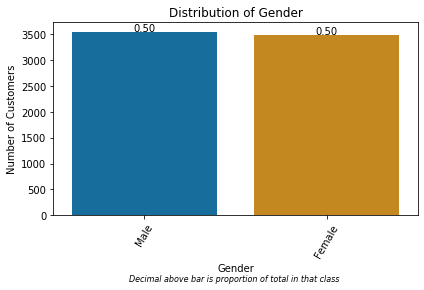

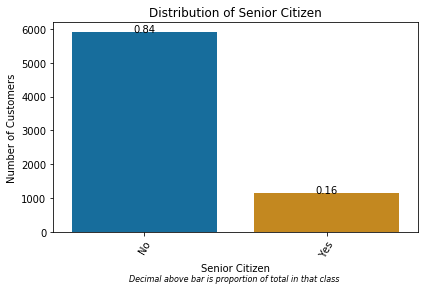

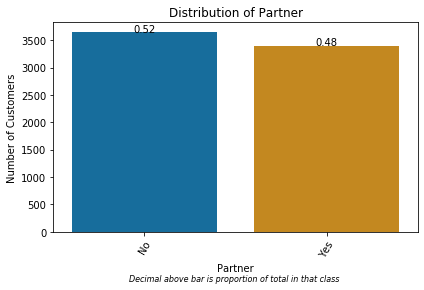

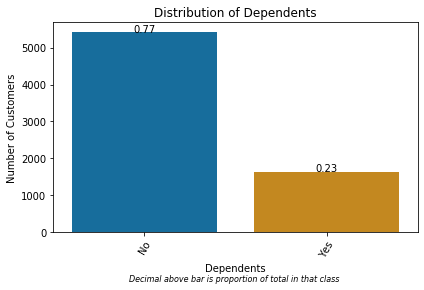

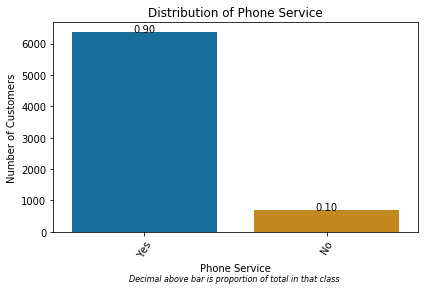

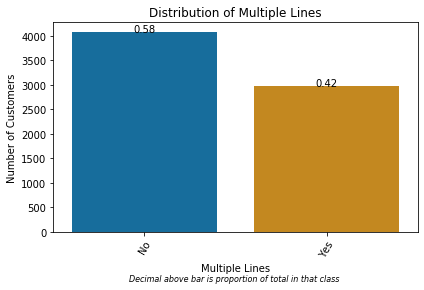

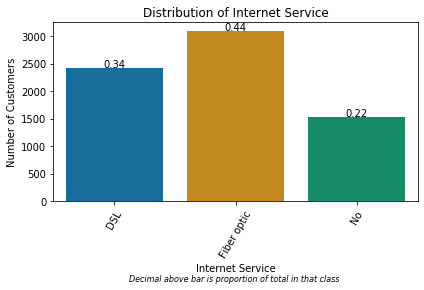

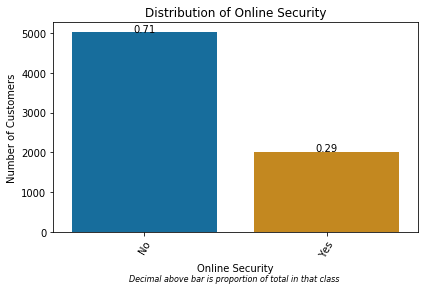

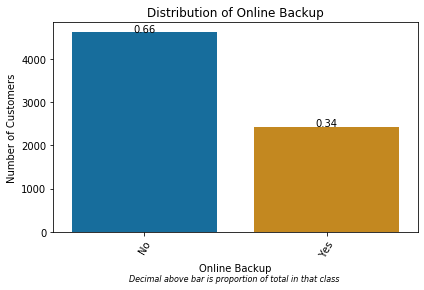

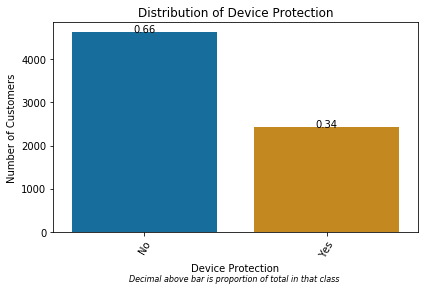

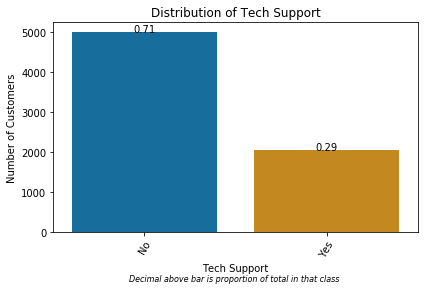

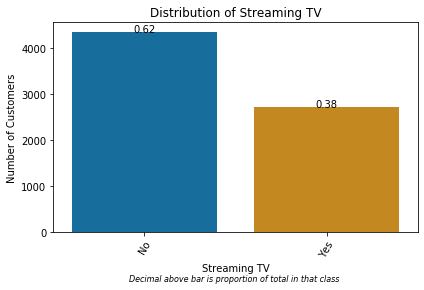

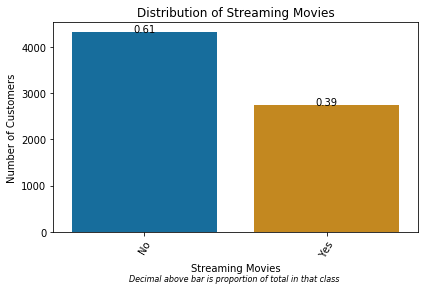

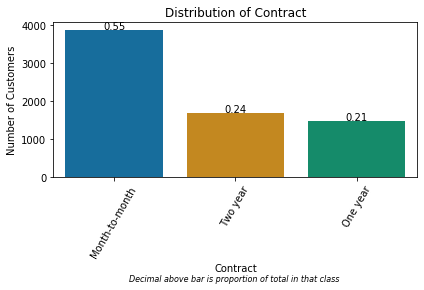

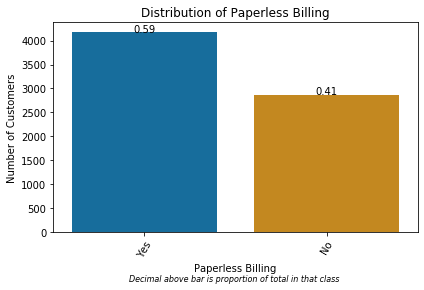

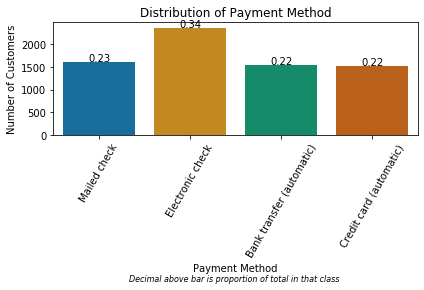

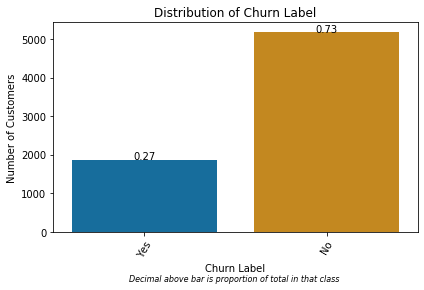

In [27]:
## Plot distributions of categorical variables
for i in cats:
    ax = sns.countplot(x = df[i], data = df, palette = 'colorblind')
    total = float(len(df[i])) 
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 10,
                '{:1.2f}'.format(height/total),
                ha="center")
    plt.title('Distribution of ' + str(i))
    plt.ylabel('Number of Customers')
    plt.figtext(0.55, 0.01, 
                'Decimal above bar is proportion of total in that class',
                horizontalalignment = 'center', fontsize = 8,
                style = 'italic')
    plt.xticks(rotation = 60)
    plt.tight_layout()
    plt.savefig('plot_dist-' + str(i) + '.png', dpi = 200)
    plt.show()

In [28]:
df.head()

,Count,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
9237-HQITU,1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,1,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7892-POOKP,1,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
0280-XJGEX,1,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


Gender Counter({'Male': 3555, 'Female': 3488})


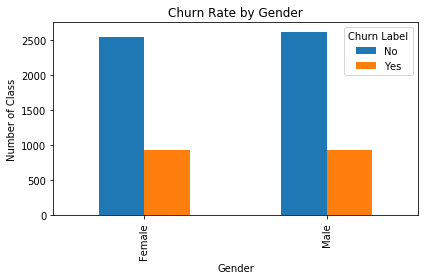

In [29]:
## Churn by gender
gender_churn = df.reset_index().groupby(['Gender', 'Churn Label'], as_index=False).agg({'CustomerID': 'count'})
gender_pivot = pd.pivot(gender_churn, index = 'Gender', columns = 'Churn Label', values = 'CustomerID')
gender = df.reset_index().groupby(['Gender']).agg({'CustomerID': 'count'})

gender_churn_pct = gender_churn.div(gender, level='Gender') * 100
gender_churn_pct = gender_churn_pct.reset_index()
print('Gender', collections.Counter(df['Gender']))
#print('Percent of Females that Left the Company {}'.format(gender_churn_pct))
#sns.barplot(x = 'Gender' , y = 'CustomerID', hue = 'Churn Label',
#            data = gender_pivot)
gender_pivot.plot(kind ='bar')
plt.title('Churn Rate by Gender')
plt.ylabel('Number of Class')
plt.tight_layout()
#plt.savefig('plot-churn_by_gender.png', dpi = 200)
plt.show()

Contract Counter({'Month-to-month': 3875, 'Two year': 1695, 'One year': 1473})


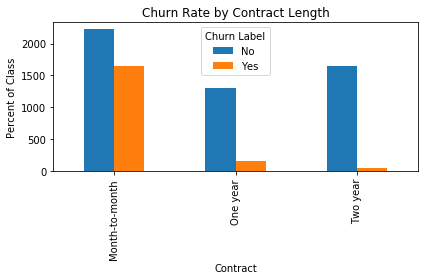

In [30]:
contract_churn = df.reset_index().groupby(['Contract', 'Churn Label'], as_index=False).agg({'CustomerID': 'count'})
contract = df.reset_index().groupby(['Contract']).agg({'CustomerID': 'count'})

contract_pivot = pd.pivot_table(contract_churn, index = 'Contract', columns = 'Churn Label', values = 'CustomerID')
contract_churn_pct = contract_churn.div(contract, level='Contract') * 100
contract_churn_pct = contract_churn_pct.reset_index()
print('Contract', collections.Counter(df['Contract']))
#display(contract_churn)
#sns.barplot(x = df['Contract'] , y = df['CustomerID'], hue = df['Churn Label'],
#            data = contract_churn)
contract_pivot.plot(kind ='bar')
plt.title('Churn Rate by Contract Length')
plt.ylabel('Percent of Class')
plt.tight_layout()
plt.savefig('plot-churn_by_contract.png', dpi = 200)
plt.show()

Internet Service Counter({'Fiber optic': 3096, 'DSL': 2421, 'No': 1526})


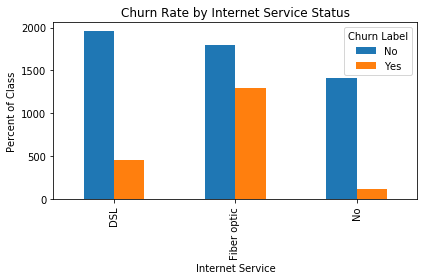

In [31]:
## Churn by internet service
internet_churn = df.reset_index().groupby(['Internet Service', 'Churn Label']).agg({'CustomerID': 'count'})
internet = df.reset_index().groupby(['Internet Service']).agg({'CustomerID': 'count'})
internet_churn_pct = internet_churn.div(internet, level='Internet Service') * 100
internet_churn_pct = internet_churn_pct.reset_index()
print('Internet Service', collections.Counter(df['Internet Service']))
internet_pivot = pd.pivot_table(internet_churn, index = 'Internet Service', columns = 'Churn Label', 
                                values = 'CustomerID')

#sns.barplot(x = 'Internet Service' , y = 'CustomerID', hue = 'Churn Label',
#            data = internet_churn)
internet_pivot.plot(kind ='bar')
plt.title('Churn Rate by Internet Service Status')
plt.ylabel('Percent of Class')
plt.tight_layout()
#plt.savefig('plot-churn_by_internet.png', dpi = 200)
plt.show()

Partner Counter({'No': 3641, 'Yes': 3402})
Dependents Counter({'No': 5416, 'Yes': 1627})


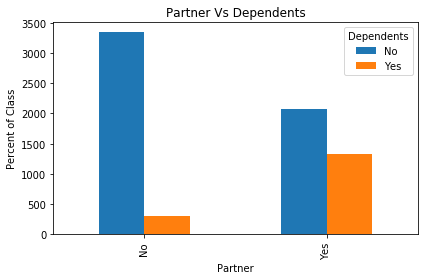

In [32]:
##Partner Vs Dependents
partner_dep = df.reset_index().groupby(['Partner', 'Dependents']).agg({'CustomerID': 'count'})
partner = df.reset_index().groupby(['Partner']).agg({'CustomerID': 'count'})
partner_dep_pct = partner_dep.div(partner, level='Partner') * 100
partner_dep_pct = partner_dep_pct.reset_index()
print('Partner', collections.Counter(df['Partner']))
print('Dependents', collections.Counter(df['Dependents']))

partner_dep_pivot = pd.pivot_table(partner_dep, index = 'Partner', columns = 'Dependents', 
                                values = 'CustomerID')
#sns.barplot(x = 'InternetService' , y = 'customerID', hue = 'Churn',
#            data = internet_churn_pct)
partner_dep_pivot.plot(kind ='bar')
plt.title('Partner Vs Dependents')
plt.ylabel('Percent of Class')
plt.tight_layout()

plt.show()

Partner Counter({'No': 3641, 'Yes': 3402})
                     CustomerID
Partner Churn Label            
No      No                 2441
        Yes                1200
Yes     No                 2733
        Yes                 669


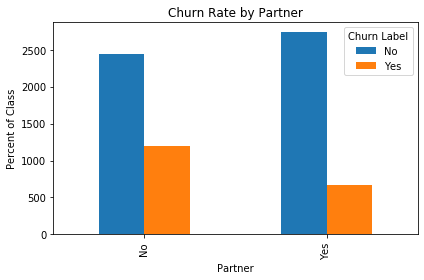

In [33]:
# Partner Vs Churn
partner_churn = df.reset_index().groupby(['Partner', 'Churn Label']).agg({'CustomerID': 'count'})
partner = df.reset_index().groupby(['Partner']).agg({'CustomerID': 'count'})
partner_churn_pct = partner_churn.div(partner, level='Partner') * 100
partner_churn_pct = partner_churn_pct.reset_index()
print('Partner', collections.Counter(df['Partner']))
print(partner_churn)
partner_pivot = pd.pivot_table(partner_churn, index = 'Partner', columns = 'Churn Label', 
                                values = 'CustomerID')
#sns.barplot(x = 'Partner' , y = 'CustomerID', hue = 'Churn Label',
#            data = partner_churn_pct)
partner_pivot.plot(kind ='bar')
plt.title('Churn Rate by Partner')
plt.ylabel('Percent of Class')
plt.tight_layout()

plt.show()

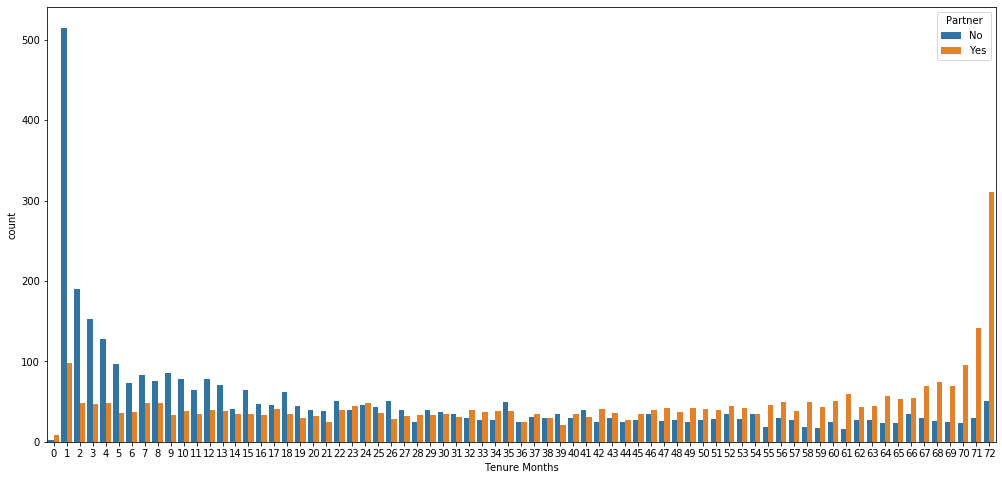

In [34]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['Tenure Months'],hue=df.Partner);

In [35]:
df["Senior Citizen"] = df["Senior Citizen"].replace({"Yes":1,"No":0}).astype('category')

In [36]:
display(df["Senior Citizen"].dtype)

CategoricalDtype(categories=[0, 1], ordered=False)

In [37]:
display(df["Senior Citizen"][:5])

CustomerID
3668-QPYBK    0
9237-HQITU    0
9305-CDSKC    0
7892-POOKP    0
0280-XJGEX    0
Name: Senior Citizen, dtype: category
Categories (2, int64): [0, 1]

Senior Citizen Counter({0: 5901, 1: 1142})
                            CustomerID
Senior Citizen Churn Label            
0              No                 4508
               Yes                1393
1              No                  666
               Yes                 476


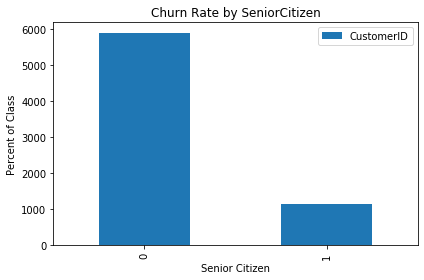

In [38]:
# Senior Citizen Vs Churn
SeniorCitizen_churn = df.reset_index().groupby(['Senior Citizen', 'Churn Label'],as_index=True).agg({'CustomerID': 'count'})
SeniorCitizen = df.reset_index().groupby(['Senior Citizen']).agg({'CustomerID': 'count'})
SeniorCitizen_churn_pct = SeniorCitizen_churn.div(partner, level='Senior Citizen') * 100
SeniorCitizen_churn_pct = SeniorCitizen_churn_pct.reset_index()
print('Senior Citizen', collections.Counter(df['Senior Citizen']))
print(SeniorCitizen_churn)

SeniorCitizen_pivot = pd.pivot_table(SeniorCitizen_churn, index = 'Senior Citizen', columns = 'Churn Label', 
                                values = 'CustomerID')
#sns.barplot(x = 'Partner' , y = 'CustomerID', hue = 'Churn Label',
#            data = partner_churn_pct)
SeniorCitizen.plot(kind ='bar')
plt.title('Churn Rate by SeniorCitizen')
plt.ylabel('Percent of Class')
plt.tight_layout()

plt.show()

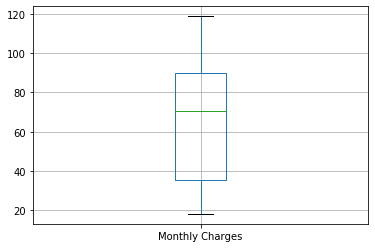

In [39]:
df.boxplot('Monthly Charges');

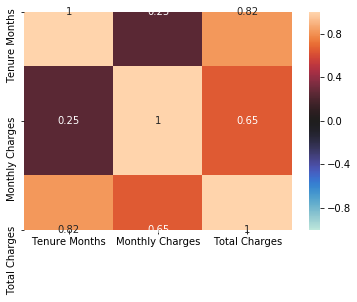

In [40]:
# correlation matrix
# Let's Check the Correaltion Matrix in Seaborn
sns.heatmap(df[['Senior Citizen','Tenure Months', 'Monthly Charges', 'Total Charges']].corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [41]:
#Tenure to categorical column
def tenure_lab(telcom) :
    if telcom["Tenure Months"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["Tenure Months"] > 12) & (telcom["Tenure Months"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["Tenure Months"] > 24) & (telcom["Tenure Months"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["Tenure Months"] > 48) & (telcom["Tenure Months"] <= 60) :
        return "Tenure_48-60"
    elif telcom["Tenure Months"] > 60 :
        return "Tenure_gt_60"
df["tenure_group"] = df.apply(lambda x:tenure_lab(x),axis = 1)

### Data preprocessing
#### Encoding categorical variable

In [42]:
#replace values
df["Senior Citizen"] = df["Senior Citizen"].replace({1:"Yes",0:"No"})

In [43]:
#customer id col

Id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()

for i in bin_cols :
    df[i] = le.fit_transform(df[i])

#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Count_1', 'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24',
       'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60',
       'tenure_group_Tenure_gt_60'],
      dtype='object')

### Normalizing features

In [44]:
scale_vars = ['Tenure Months', 'Monthly Charges']
scaler = Normalizer() 
df[scale_vars] = scaler.fit_transform(df[scale_vars])
df[scale_vars].describe()

,Tenure Months,Monthly Charges
count,7043.000000,7043.000000
mean,0.414551,0.844866
std,0.282215,0.186330
min,0.000000,0.258915
25%,0.148897,0.787579
50%,0.421731,0.906721
75%,0.616214,0.988853
max,0.965900,1.000000


### spliting train/val/test data

In [45]:
X = df.drop('Churn Label', axis = 1)
y= df['Churn Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify = y, random_state = 42)

### Model Building

In [46]:
from sklearn.dummy import DummyClassifier

# Feature Selection and Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer, MinMaxScaler, OneHotEncoder, label_binarize

# Machine learning
from sklearn import model_selection
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [47]:
# validation
from sklearn import metrics

In [48]:
# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [49]:
# Metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

In [50]:
#utilities
import time
import io, os, sys, types, time, datetime, math, random

#### calculate the fpr and tpr for all thresholds of the classification

In [51]:
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier,
                          SVC,
                          GaussianNB, 
                          DecisionTreeClassifier,
                          RandomForestClassifier,
                          SGDClassifier,
                          AdaBoostClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [52]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [53]:
accuracy = clf.score(X_test, y_test)
accuracy

0.73450070989115

In [54]:
preds = clf.predict(X_test)
# dummyistic Regression

start_time = time.time()

train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy,probs_dummy = fit_ml_algo(DummyClassifier(strategy='most_frequent', random_state=0),X_train, y_train, X_test, 10)

dummy_time = (time.time() - start_time)

print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))
print (metrics.classification_report(y_train, train_pred_dummy))
print (metrics.classification_report(y_test, test_pred_dummy))

Accuracy: 73.45
Accuracy CV 10-Fold: 73.47
Running Time: 0:00:03.727521
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3622
           1       0.00      0.00      0.00      1308

    accuracy                           0.73      4930
   macro avg       0.37      0.50      0.42      4930
weighted avg       0.54      0.73      0.62      4930

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



In [55]:
train_pred_log, test_pred_log, acc_log, acc_cv_log,probs_log = fit_ml_algo(LogisticRegression(random_state=42),
                                                                                          X_train, y_train, X_test,10)

train_pred_sgdc, test_pred_sgdc, acc_sgdc, acc_cv_sgdc,probs_sgdc = fit_ml_algo(SGDClassifier(loss = 'log',random_state=42),
                                                                                          X_train, y_train, X_test,10)
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt,probs_dt = fit_ml_algo(DecisionTreeClassifier(random_state=42),
                                                                                          X_train, y_train, X_test, 10)
train_pred_svc, test_pred_svc, acc_svc, acc_cv_svc,probs_svc = fit_ml_algo(SVC(probability=True,random_state=42),
                                                                                          X_train, y_train, X_test, 10)
train_pred_nb, test_pred_nb, acc_nb, acc_cv_nb,probs_nb = fit_ml_algo(GaussianNB(),
                                                                                          X_train, y_train, X_test, 10)
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn,probs_knn = fit_ml_algo(KNeighborsClassifier(),
                                                                                          X_train, y_train, X_test, 10)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf,probs_rf = fit_ml_algo(RandomForestClassifier(random_state=42),
                                                                                          X_train, y_train, X_test,10 )
train_pred_gbc, test_pred_gbc, acc_gbc, acc_cv_gbc,probs_gbc = fit_ml_algo(GradientBoostingClassifier(random_state=42),
                                                                                          X_train, y_train, X_test, 10)


In [56]:
models = pd.DataFrame({
    'Model': ['LogisticRegression', 'SGDClassifier', 
              'DecisionTreeClassifier', 'LinearSVC', 
              'GaussianNB', 'KNeighborsClassifier', 
              'RandomForestClassifier', 'GradientBoostingClassifier'],
    'Score': [
        acc_log, 
        acc_sgdc, 
        acc_dt, 
        acc_svc, 
        acc_nb, 
        acc_knn, 
        acc_rf,
        acc_gbc
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,LogisticRegression,80.74
7,GradientBoostingClassifier,79.74
6,RandomForestClassifier,78.09
3,LinearSVC,76.19
5,KNeighborsClassifier,74.78
4,GaussianNB,73.88
2,DecisionTreeClassifier,73.59
1,SGDClassifier,73.45


In [57]:
models = pd.DataFrame({
    'Model': ['LogisticRegression', 'SGDClassifier', 
              'DecisionTreeClassifier', 'LinearSVC', 
              'GaussianNB', 'KNeighborsClassifier', 
              'RandomForestClassifier', 'GradientBoostingClassifier'],
    'Score': [
        acc_cv_log, 
        acc_cv_sgdc, 
        acc_cv_dt, 
        acc_cv_svc, 
        acc_cv_nb, 
        acc_cv_knn, 
        acc_cv_rf,
        acc_cv_gbc
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,LogisticRegression,81.16
7,GradientBoostingClassifier,81.10
6,RandomForestClassifier,78.42
4,GaussianNB,75.52
3,LinearSVC,75.17
2,DecisionTreeClassifier,74.40
5,KNeighborsClassifier,73.73
1,SGDClassifier,59.96


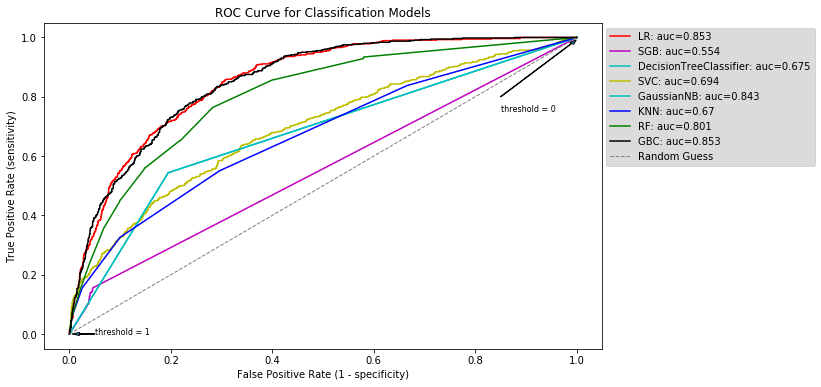

In [58]:
plt.figure(figsize =(10,6))

lr_fpr, lr_tpr, lr_thresh = roc_curve(y_test, probs_log)
plt.plot(lr_fpr,lr_tpr,label="LR: auc="+str(round(roc_auc_score(y_test, probs_log), 3)),
         color = 'r')

sgb_fpr, sgb_tpr, sgb_thresh = roc_curve(y_test, probs_sgdc)
plt.plot(sgb_fpr,sgb_tpr,label="SGB: auc="+str(round(roc_auc_score(y_test, probs_sgdc), 3)),
         color = 'm')

dt_fpr, dt_tpr, dt_thresh = roc_curve(y_test, probs_dt)
plt.plot(dt_fpr,dt_tpr,label="DecisionTreeClassifier: auc="+str(round(roc_auc_score(y_test, probs_dt), 3)),
         color = 'c')

svc_fpr, svc_tpr, svc_thresh = roc_curve(y_test, probs_svc)
plt.plot(svc_fpr,svc_tpr,label="SVC: auc="+str(round(roc_auc_score(y_test, probs_svc), 3)),
         color = 'y')

nb_fpr, nb_tpr, nb_thresh = roc_curve(y_test, probs_nb)
plt.plot(dt_fpr,dt_tpr,label="GaussianNB: auc="+str(round(roc_auc_score(y_test, probs_nb), 3)),
         color = 'c')

knn_fpr, knn_tpr, knn_thresh = roc_curve(y_test, probs_knn)
plt.plot(knn_fpr,knn_tpr,label="KNN: auc="+str(round(roc_auc_score(y_test, probs_knn), 3)),
         color = 'blue')

rf_fpr, rf_tpr, rf_thresh = roc_curve(y_test, probs_rf)
plt.plot(rf_fpr,rf_tpr,label="RF: auc="+str(round(roc_auc_score(y_test, probs_rf), 3)),
         color = 'green')

gbc_fpr, gbc_tpr, gbc_thresh = roc_curve(y_test, probs_gbc)
plt.plot(gbc_fpr,gbc_tpr,label="GBC: auc="+str(round(roc_auc_score(y_test, probs_gbc), 3)),
         color = 'k')

plt.plot([0, 1], [0, 1], color='gray', lw = 1, linestyle='--', 
         label = 'Random Guess')

plt.legend(loc = 'upper right',bbox_to_anchor=(1.39,1), frameon = True, facecolor = 'lightgray')
plt.title('ROC Curve for Classification Models')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.text(0.85,0.75, 'threshold = 0', fontsize = 8)
plt.arrow(0.85,0.8, 0.14,0.18, head_width = 0.01)
plt.text(0.05,0, 'threshold = 1', fontsize = 8)
plt.arrow(0.05,0, -0.03,0, head_width = 0.01)
plt.show()

In [59]:
#tuning the gradient boosted tree
gbc = GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)

# Set up hyperparameter grid for tuning
param_grid = {'n_estimators' : [200, 300, 400, 500],
                  'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4],
                  'max_depth' : [3, 4, 5, 6, 7],
                  'min_samples_split': [2, 5, 10, 20],
                  'min_weight_fraction_leaf': [0.001, 0.01, 0.05],
                  'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                  'max_features': ['sqrt', 'log2']}

## Tune hyperparamters
gbc_cv = RandomizedSearchCV(gbc, param_distributions = param_grid, cv = 10, 
                            random_state = 42, n_iter = 20)

## Fit SGB to training data
gbc_cv.fit(X_train, y_train)

## Get info about best hyperparameters
print("Tuned GBC Parameters: {}".format(gbc_cv.best_params_))
print("Best GBC Training Score:{}".format(gbc_cv.best_score_)) 

## Predict SGB on test data
print("GBC Test Performance: {}".format(gbc_cv.score(X_test, y_test)))

## Obtain model performance metrics
gbc_pred_prob = gbc_cv.predict_proba(X_test)[:,1]
gbc_auroc = roc_auc_score(y_test, gbc_pred_prob)
print("SGB AUROC: {}".format(gbc_auroc))
gbc_y_pred = gbc_cv.predict(X_test)
print(classification_report(y_test, gbc_y_pred))

Tuned GBC Parameters: {'subsample': 0.7, 'n_estimators': 400, 'min_weight_fraction_leaf': 0.05, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.01}
Best GBC Training Score:0.8139959432048681
GBC Test Performance: 0.8021769995267393
SGB AUROC: 0.856832423691126
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.66      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



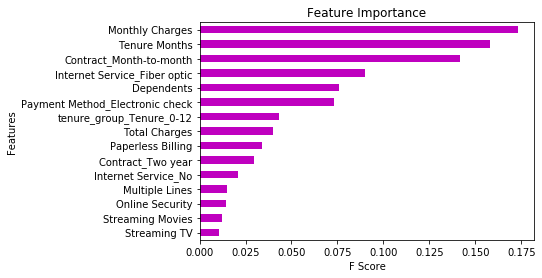

In [62]:
gbc_ = gbc_cv.best_estimator_
importances = pd.Series(gbc_.feature_importances_, index=X_train.columns)
importances.nlargest(15).sort_values(ascending = True).plot(kind='barh', color = 'm')
plt.title('Feature Importance')
plt.xlabel('F Score')
plt.ylabel('Features')
plt.show()

Looking at the areas under the curve, we see that the Gradient boosting tree and Logistic Regression models perform the best, with an AUC of 0.853; the worst model is the Stochastic gradient Classifier, which has AUC of 0.554. Thus the performance of Gradient boosting tree and Logistic Regression models are generally quite similar.